In [ ]:
!pip install numpy==1.23.5
!pip install matplotlib==3.7.1

!pip install torch==2.1.1
!pip install transformers==4.36.2
!pip install Pillow==9.4.0

!pip install gradio==4.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation

processor = SegformerImageProcessor.from_pretrained('mattmdjaga/segformer_b2_clothes')
model = AutoModelForSemanticSegmentation.from_pretrained('mattmdjaga/segformer_b2_clothes')


preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

In [ ]:
!pip install requests

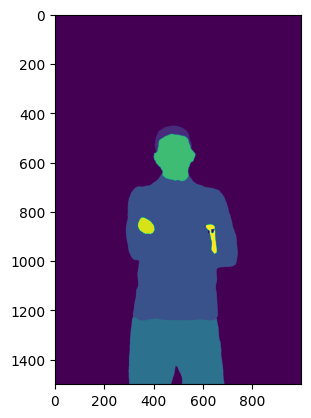

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"

image = Image.open(requests.get(url,stream=True).raw)
inputs = processor(images=image, return_tensors='pt')

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)
pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

from PIL import Image
from torch import nn

def segment_image(image):
  image = Image.fromarray(image)

  inputs = processor(images=image, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits.cpu()
  upsampled_logits = nn.functional.interpolate(
          logits,
          size=image.size[::-1],
          mode="bilinear",
          align_corners=False,
      )
  pred_seg = upsampled_logits.argmax(dim=1)[0].numpy()

  colormap = plt.get_cmap('tab20').colors  # 'tab20' has 20 distinct colors
  colormap = np.array(colormap) * 255  # Convert to 0-255 range


  colored_seg = np.zeros((*pred_seg.shape, 3), dtype=np.uint8)
  for label in range(18):  # 0 to 17 inclusive
      colored_seg[pred_seg == label] = colormap[label]
  return colored_seg

gr_image_input = gr.Image(image_mode='RGB', type='numpy')
gr_image_output = gr.Image(type='numpy', label='Segmented Image')

demo = gr.Interface(fn=segment_image, inputs=gr_image_input, outputs=gr_image_output)


In [18]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://87457851c2c33fa0ce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
